# Here we perform EDA 

first we import libs

In [1]:
import os
import platform
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

import seaborn as sns 
#from textstat import flesch_reading_ease
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams


then we fetch the data

In [15]:
def check_os_and_load_data(filename):
    if platform.system() == "Windows":
        print("This is a Windows system. Running Windows-specific code.")
        # Assuming the directory path for Windows is '../data/train/'
        path = os.path.join('data', 'train', filename)
        data = pd.read_csv(path)
        
    elif platform.system() == "Linux":
        print("This is a Linux system. Running Linux-specific code.")
        # Assuming the directory path for Linux is the home directory
        path = os.path.join(os.path.expanduser('~'), 'ownCloud - Michael Saxer (zhaw.ch)@drive.switch.ch', '4 Semester', 'NLP', 'workbench', filename)
        data = pd.read_csv(path)
        
    else:
        print("This is neither a Windows nor a Linux system. You're on your own, sorry.")
        data = None  # Or handle other operating systems as needed
    
    if data is not None:
        if 'id' in data.columns:
            del data['id']
        # data.head()  # Uncomment this if you want to see the first few rows of the dataframe
    return data

# Example usage
# Pass only the filename, not the path.
data = check_os_and_load_data('train.csv')

This is a Windows system. Running Windows-specific code.


now we gather some sumary statistic ( be aware that since they are categorial values one cannot really get that much insights from it this way.)

In [4]:
data.describe(include = 'all')
#data.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,Explanation\nWhy the edits made under my usern...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# now lets do some more

In [3]:
# Basic Statistics
basic_stats = {
    'total_comments': data.shape[0],
    'average_length_of_comments': data['comment_text'].apply(len).mean(), # in characters
}
# Distribution of comments per classification label
label_distribution = data.iloc[:, 1:].sum().to_dict()
basic_stats.update(label_distribution)
basic_stats

{'total_comments': 159571,
 'average_length_of_comments': 394.0732213246768,
 'toxic': 15294,
 'severe_toxic': 1595,
 'obscene': 8449,
 'threat': 478,
 'insult': 7877,
 'identity_hate': 1405}

In [4]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
# Based on the user's request, let's adjust the code to also print the index of the comment and
# create a sub-DataFrame that contains these comments.

# List to hold the indices of the comments that meet the criteria
selected_indices = []

# Iterate over the categories
for category in data.columns[1:]:
    # Find the first comment with that category being the only one flagged
    for index, row in data.iterrows():
        # Check if the category count is 1 and the sum of all hate categories for that row is also 1
        if row[category] == 1 and row[1:].sum() == 1:
            print(f"Index: {index}, Category: {category}, Comment: {row['comment_text']}")
            selected_indices.append(index)
            break  # We only need the first comment, so we break after finding it

# Create a sub-DataFrame with the selected indices
sub_df = data.loc[selected_indices]


sub_df.to_csv('~/ownCloud - Michael Saxer (zhaw.ch)@drive.switch.ch/4 Semester/NLP/Projekt2 files/hatespeech:per_category.csv', index=False)


Index: 12, Category: toxic, Comment: Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
Index: 527, Category: obscene, Comment: How do you know he is dead.  Its just his plane that crashed.  Jeezz, quit busting his nuts, folks.
Index: 3712, Category: threat, Comment: Please stop. If you continue to ignore our policies by introducing inappropriate pages to Wikipedia, you will be blocked.
Index: 179, Category: insult, Comment: REPLY ABOVE:
That was me, loser. The UN defines Vietnam to be part of Southeast Asia. And far as I know Vietnam is part of ASEAN, and used to be part of French Indochina with Laos and all those shit countries Anyway your culture has always been more influenced by SEA than Han Chinese (as in proper Yan

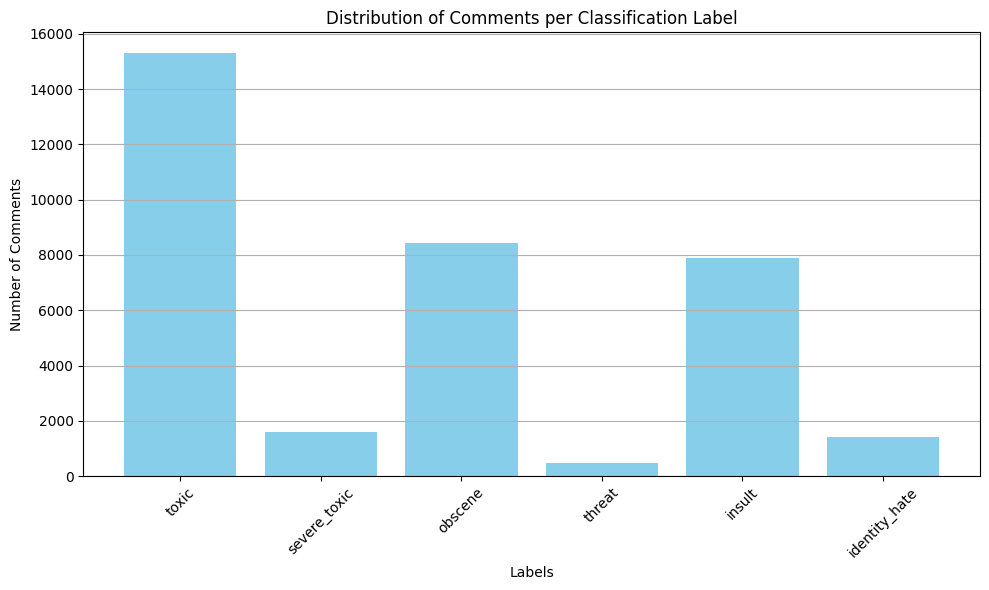

In [5]:
# Extracting label names and their respective counts
labels = list(basic_stats.keys())[2:]  # skipping 'total_comments' and 'average_length_of_comments'
counts = list(basic_stats.values())[2:]

# Create a bar plot for the label distribution
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')

# Add title and labels
plt.title('Distribution of Comments per Classification Label')
plt.xlabel('Labels')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


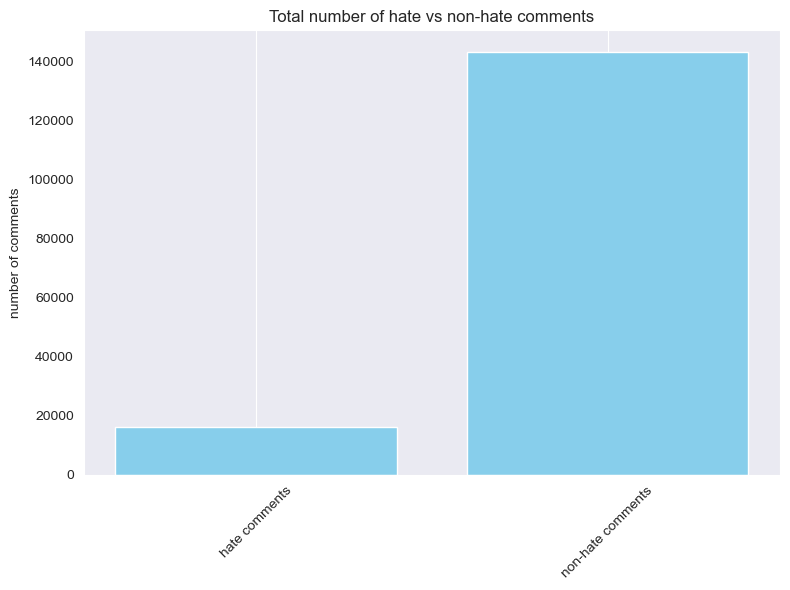

In [18]:
data['hate_comment'] = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0

# Count the number of hate and non-hate comments
hate_comments_count = data['hate_comment'].sum()
non_hate_comments_count = data.shape[0] - hate_comments_count

# Data for plotting
categories = ['hate comments', 'non-hate comments']
counts = [hate_comments_count, non_hate_comments_count]

# Create a bar plot for hate vs non-hate comments
plt.figure(figsize=(8, 6), facecolor='white')
plt.bar(categoriesegories, counts, color='skyblue')

# Add title and labels
plt.title('Total number of hate vs non-hate comments')
plt.ylabel('number of comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

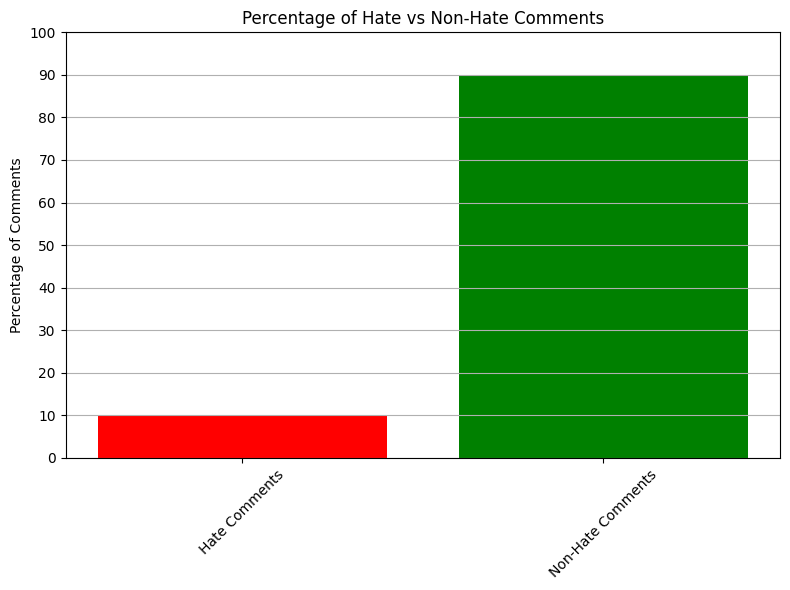

In [7]:
total_comments = data.shape[0]
hate_comments_percentage = (hate_comments_count / total_comments) * 100
non_hate_comments_percentage = (non_hate_comments_count / total_comments) * 100

# Data for plotting
categories = ['Hate Comments', 'Non-Hate Comments']
percentages = [hate_comments_percentage, non_hate_comments_percentage]

# Create a bar plot for the percentages of hate vs non-hate comments
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['red', 'green'])

# Add title and labels
plt.title('Percentage of Hate vs Non-Hate Comments')
plt.ylabel('Percentage of Comments')
plt.ylim(0, 100)  # Set the limit for the y-axis
plt.yticks([i for i in range(0, 101, 10)])


plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


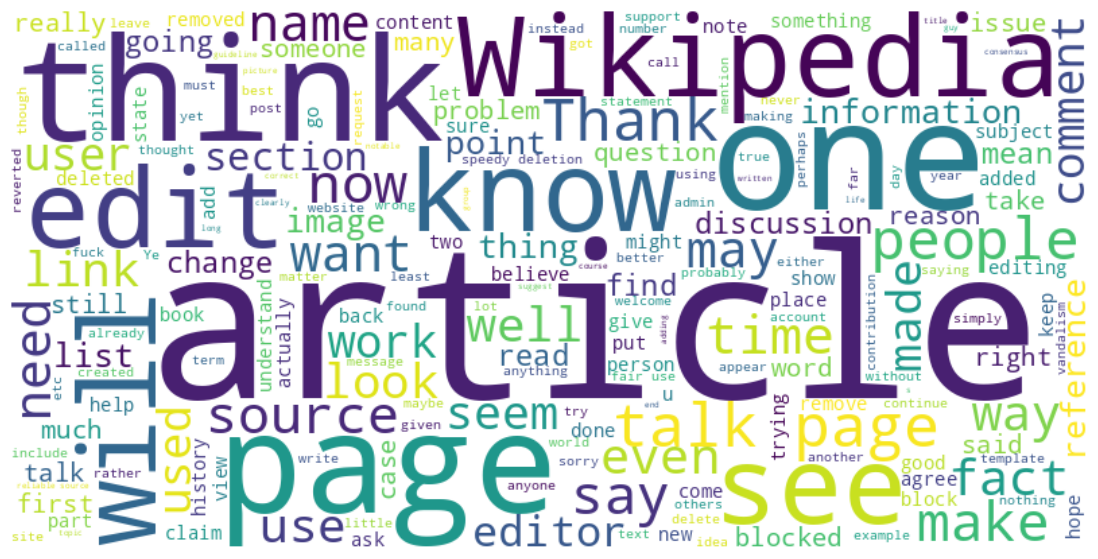

In [8]:


# Combine all comments into one large text
text = " ".join(comment for comment in data.comment_text)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


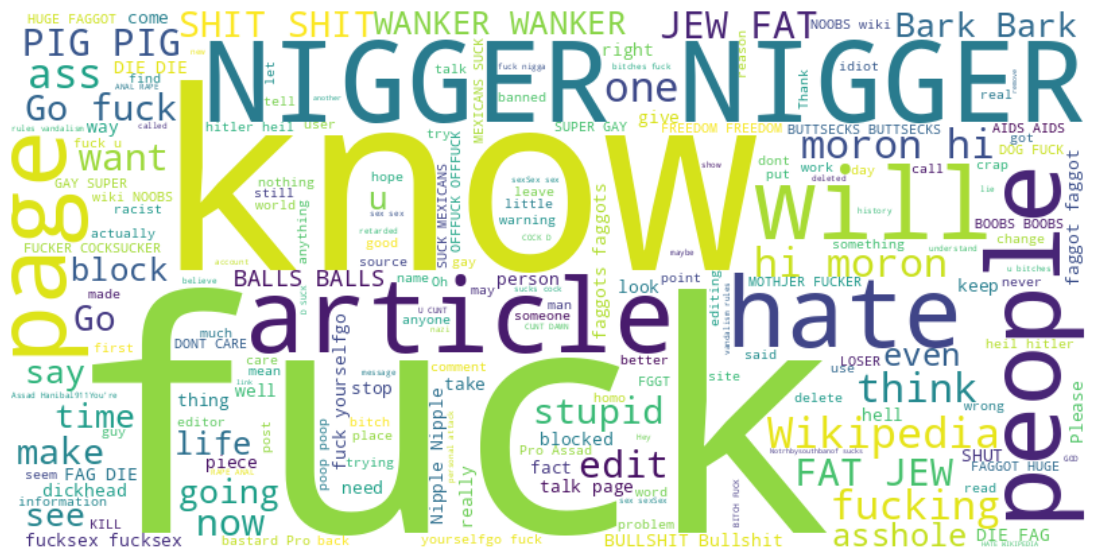

In [9]:
hate_speech_comments = data[data['hate_comment'] == 1]['comment_text']

# Combine all hate speech comments into one large text
hate_speech_text = " ".join(comment for comment in hate_speech_comments)

# Create the word cloud object for hate speech comments
hate_speech_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hate_speech_text)

# Display the generated word cloud for hate speech comments
plt.figure(figsize=(15, 7))
plt.imshow(hate_speech_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


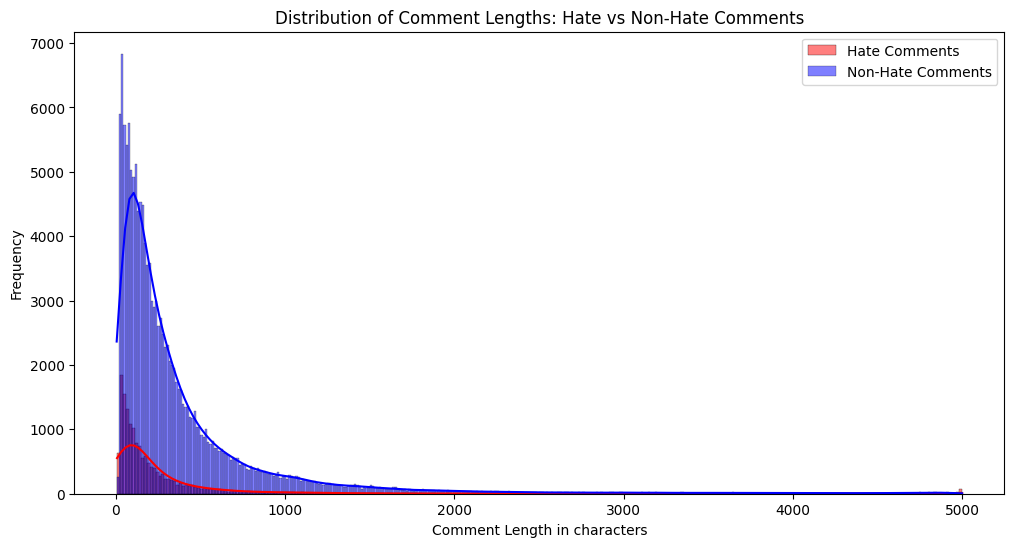

In [10]:

# Calculate the length of each comment
data['comment_length'] = data['comment_text'].apply(len)

# Separate the lengths into hate and non-hate comments
hate_comment_lengths = data[data['hate_comment'] == 1]['comment_length']
non_hate_comment_lengths = data[data['hate_comment'] == 0]['comment_length']

# Plotting the distribution of comment lengths for both categories
plt.figure(figsize=(12, 6))

# Hate comments
sns.histplot(hate_comment_lengths, color="red", label='Hate Comments', kde=True)

# Non-Hate comments
sns.histplot(non_hate_comment_lengths, color="blue", label='Non-Hate Comments', kde=True)

plt.title('Distribution of Comment Lengths: Hate vs Non-Hate Comments')
plt.xlabel('Comment Length in characters')
plt.ylabel('Frequency')
plt.legend()

plt.show()


now look at the readability  using https://de.ryte.com/wiki/Flesch-Reading-Ease#Flesch-Reading-Ease_im_Englischen

In [11]:


# Calculate the readability score for each comment
data['readability_score'] = data['comment_text'].apply(flesch_reading_ease)

# Calculate the average readability scores for hate and non-hate comments
average_readability_scores = data.groupby('hate_comment')['readability_score'].mean().reset_index()

# Renaming for clarity
average_readability_scores['comment_type'] = average_readability_scores['hate_comment'].map({1: 'Hate Comment', 0: 'Non-Hate Comment'})

# Display the results
print(average_readability_scores[['comment_type', 'readability_score']])


  comment_type  readability_score
0          NaN          67.244229
1          NaN          68.540007


lol readability vo hate comments wohl grösser hahah wür das ned bruche lol